In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread(r'C:\Users\prath\OneDrive\Pictures\Saved Pictures\marguerite.jpg')

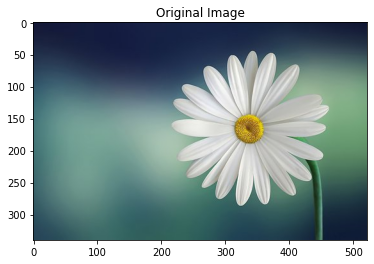

In [2]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.show()

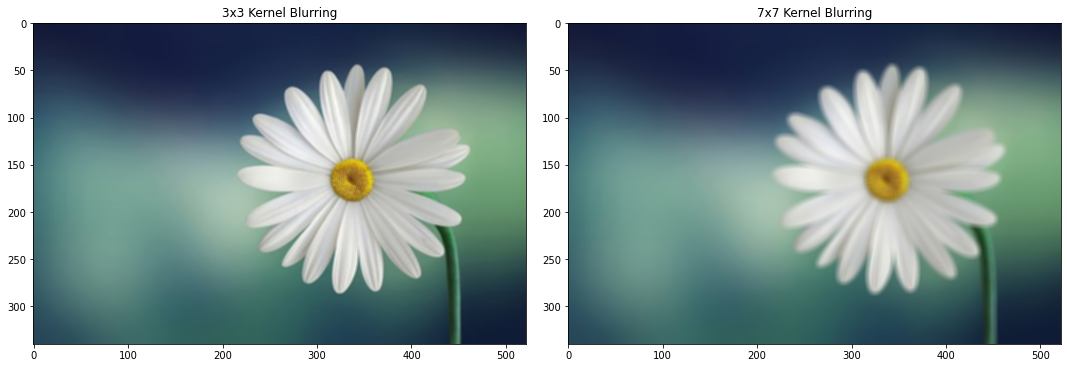

In [3]:
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
 
# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9
# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
axs[0].imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
axs[0].set_title('3x3 Kernel Blurring')

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
axs[1].imshow(cv2.cvtColor(blurred2, cv2.COLOR_BGR2RGB))
axs[1].set_title('7x7 Kernel Blurring')

plt.show()

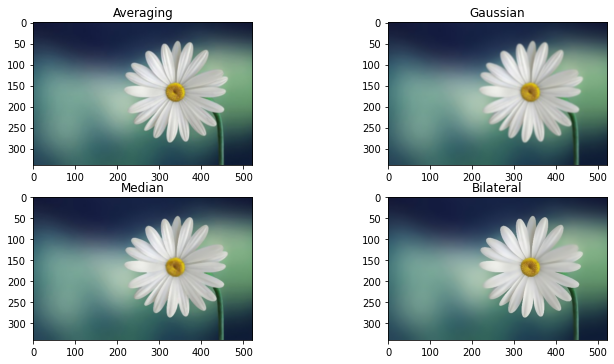

In [4]:
row, col = 2, 2
fig, axs = plt.subplots(row, col, figsize=(10, 5))
fig.tight_layout()

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (3,3))
axs[0][0].imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
axs[0][0].set_title('Averaging')
cv2.imwrite('Average Blue.png', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (7,7), 0)
axs[0][1].imshow(cv2.cvtColor(Gaussian, cv2.COLOR_BGR2RGB))
axs[0][1].set_title('Gaussian')
cv2.imwrite('Gaussian Blurring.png', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
axs[1][0].imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
axs[1][0].set_title('Median')
cv2.imwrite('Median Blurring.png', median)

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
axs[1][1].imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB))
axs[1][1].set_title('Bilateral')
cv2.imwrite('Bilateral Blurring.png', bilateral)

plt.show()

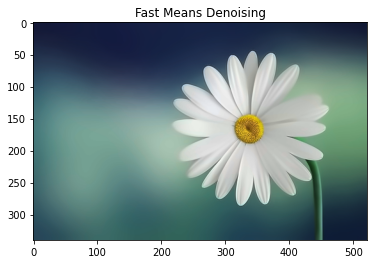

In [5]:
# Parameters, after None are - the filter strength 'h' (5-10 is a good range)
# Next is hForColorComponents, set as same value as h again
# 
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.title('Fast Means Denoising')

plt.show()